In [1]:
import cv2
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

data/examples/3-example.jpg


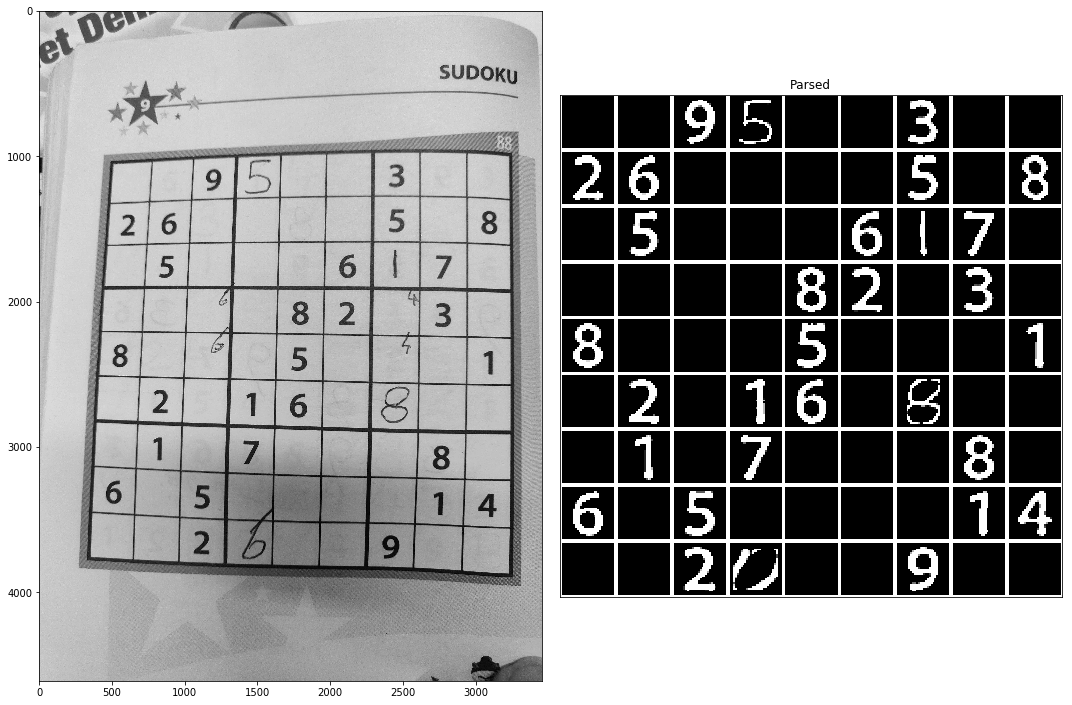

data/examples/IMG_4275.JPG


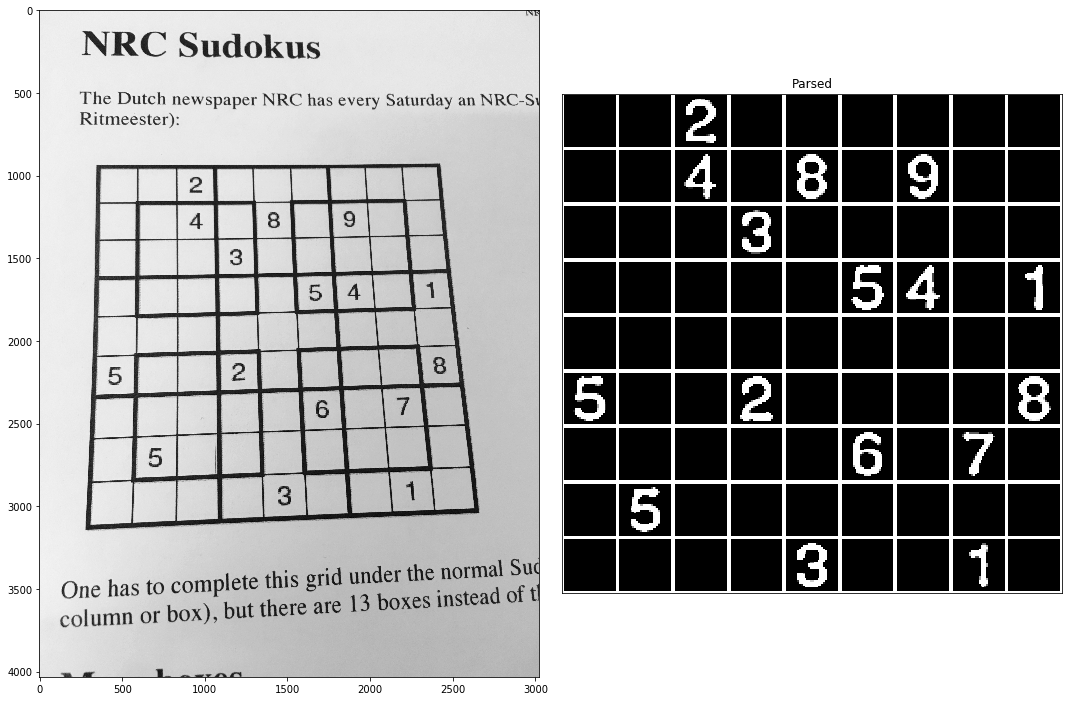

data/examples/8.jpg


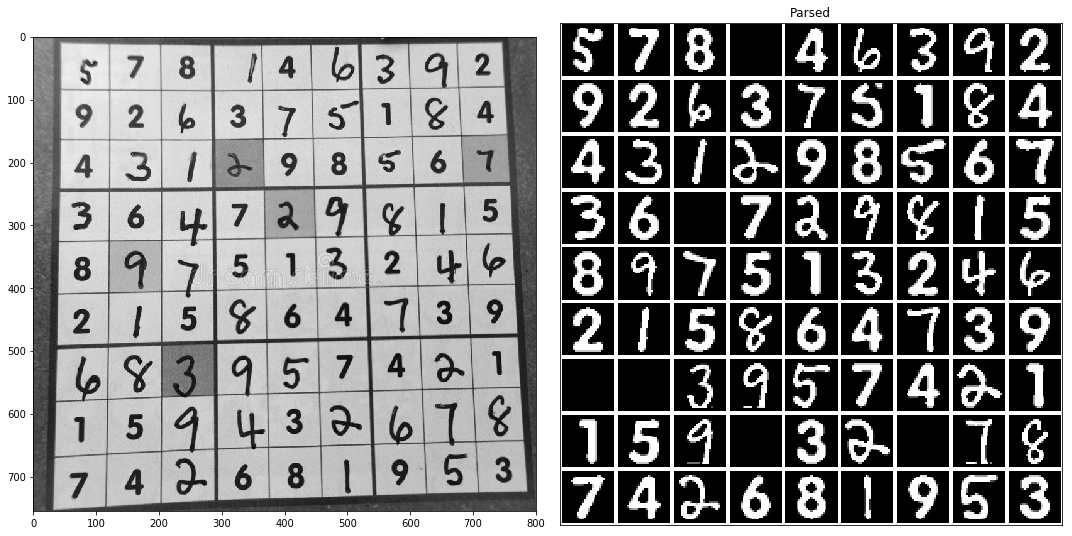

data/examples/1-example.jpeg


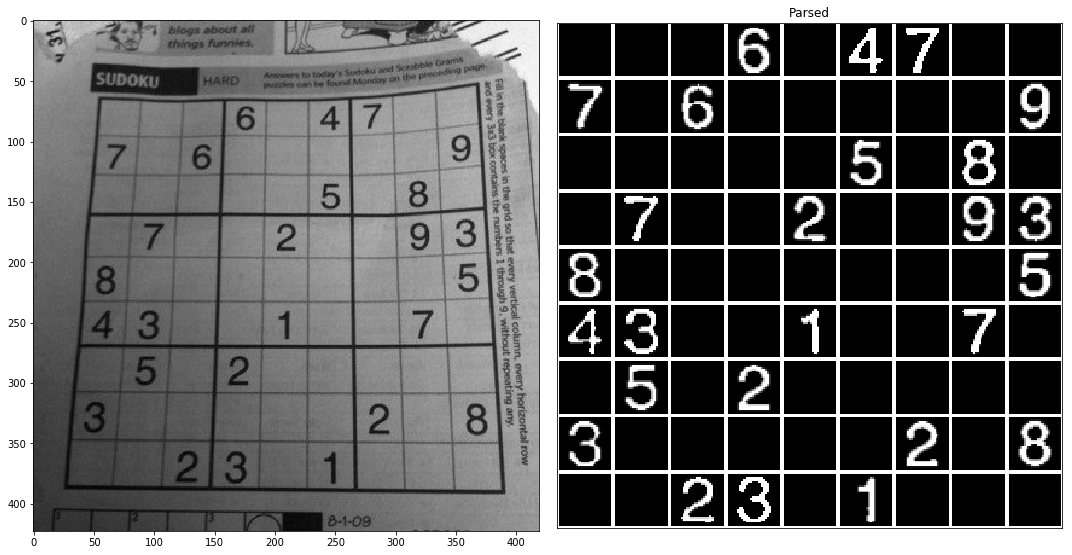

data/examples/9.jpg


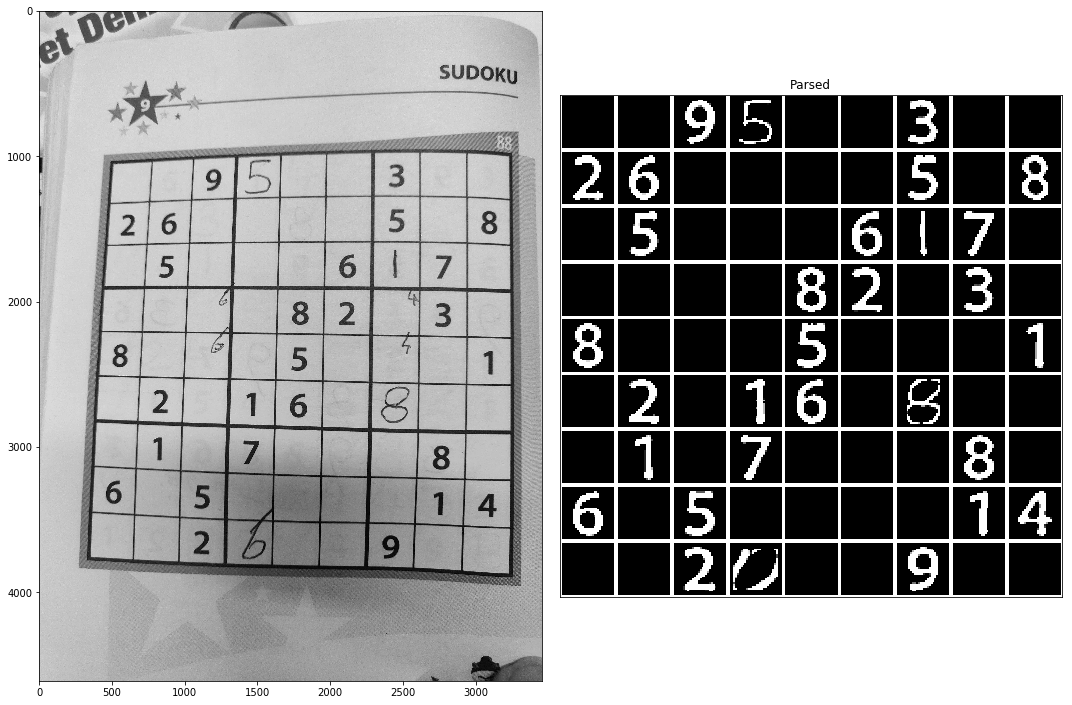

data/examples/14.png


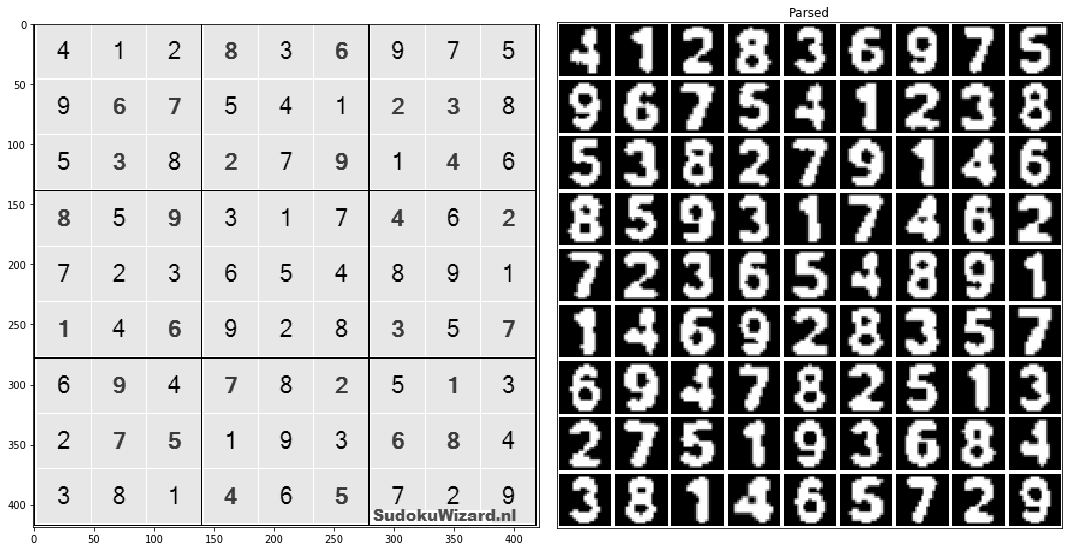

data/examples/17.jpg


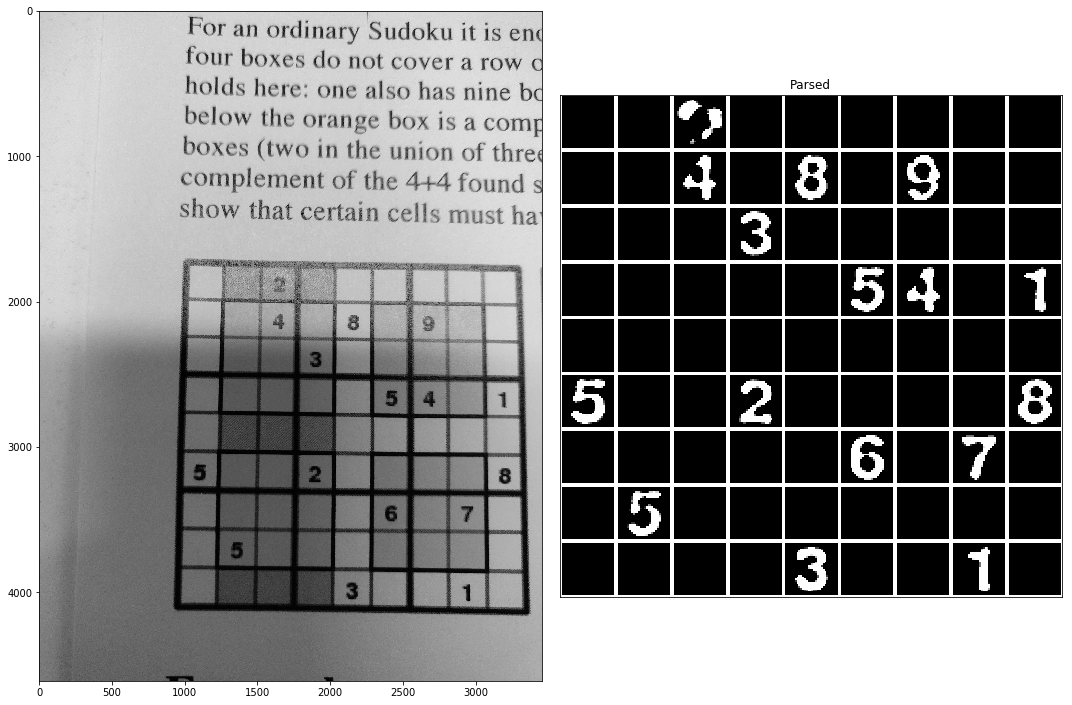

data/examples/16.jpg


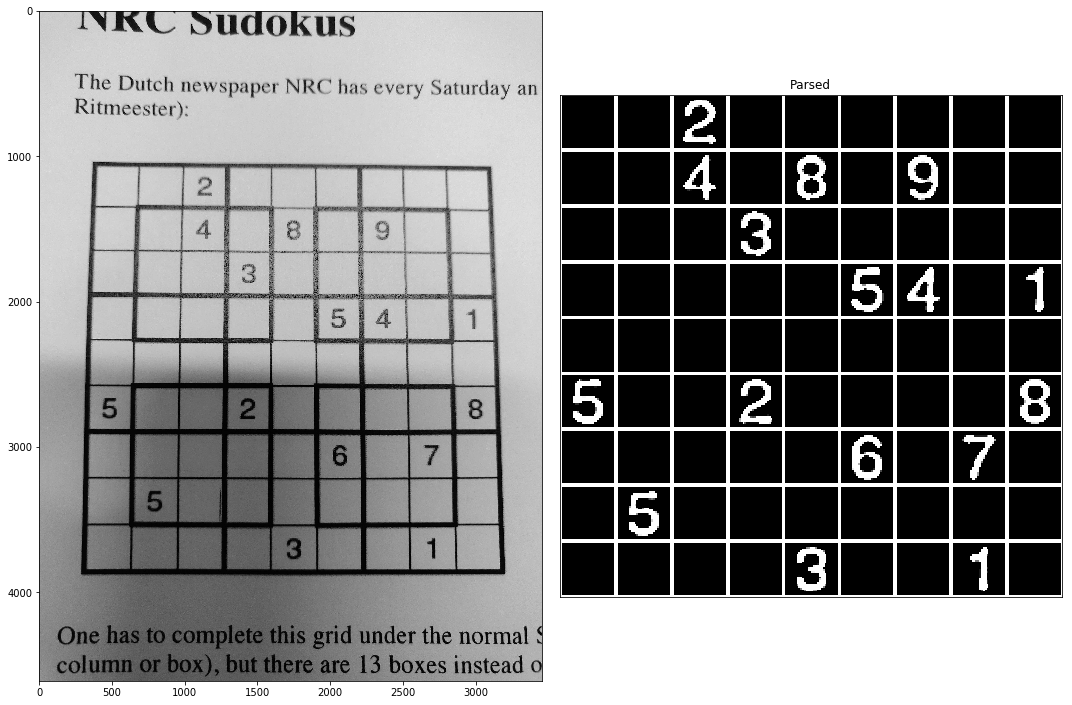

data/examples/12.jpg


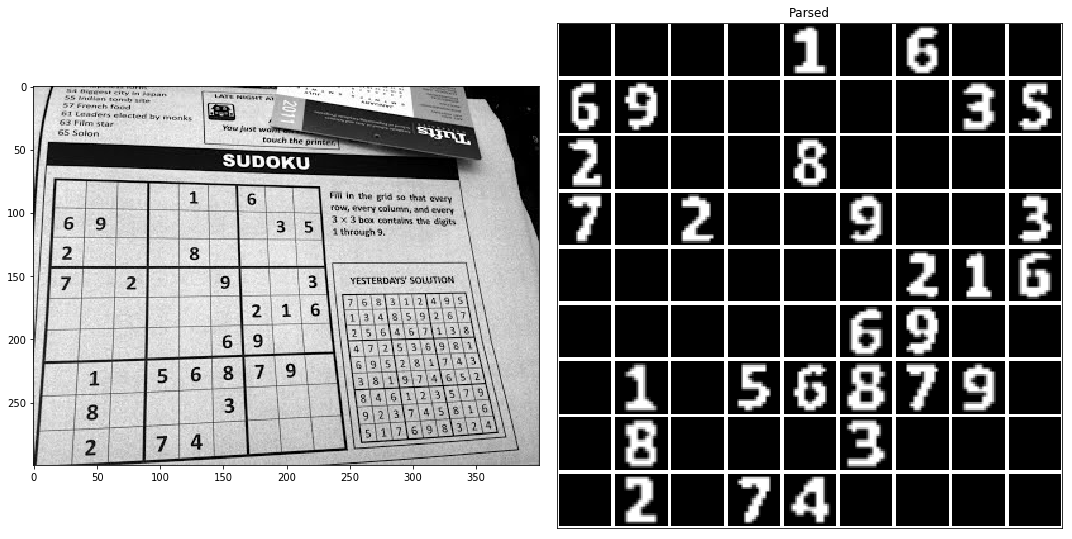

data/examples/13.jpg


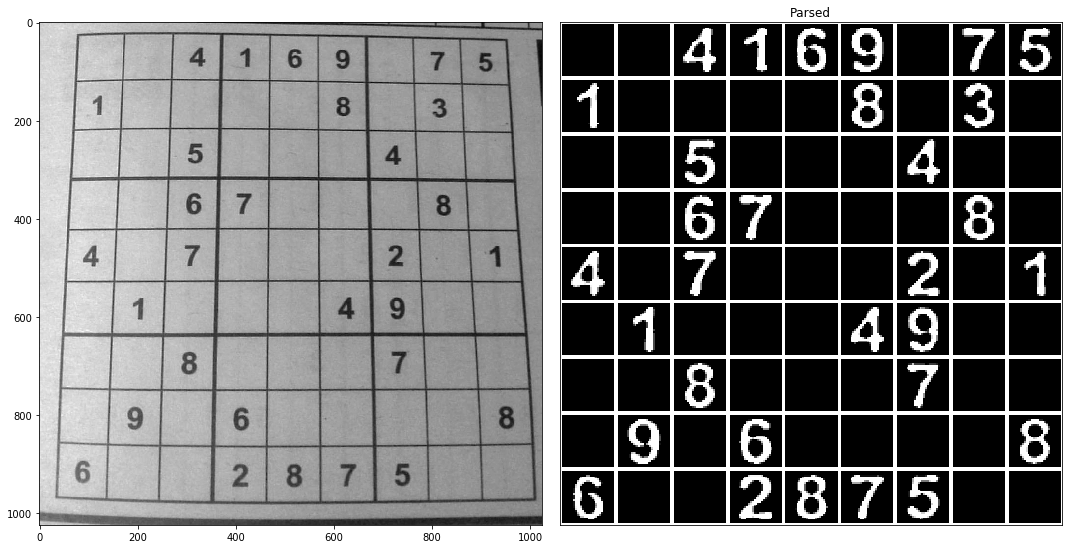

data/examples/10.jpg


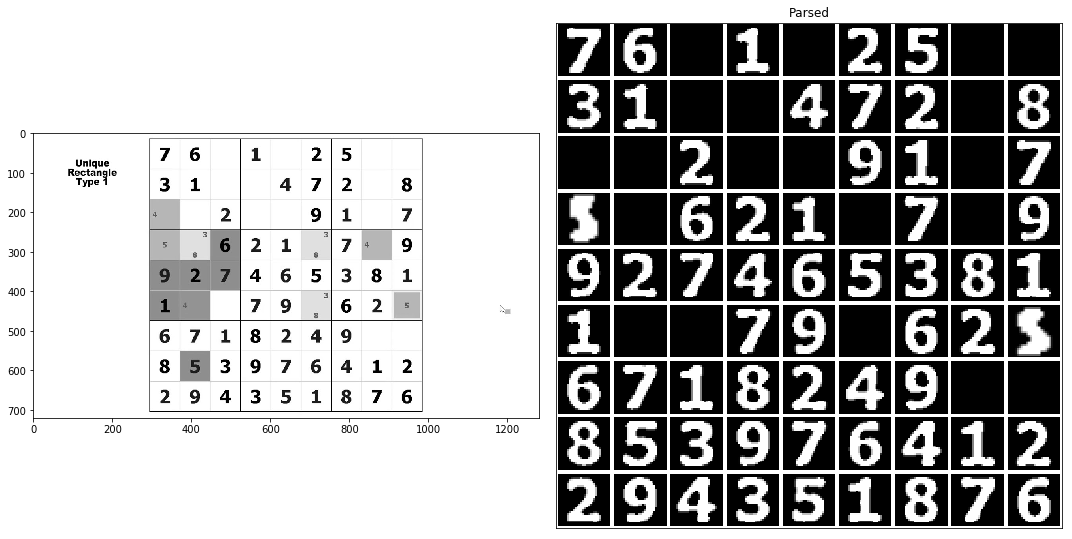

data/examples/18.jpg


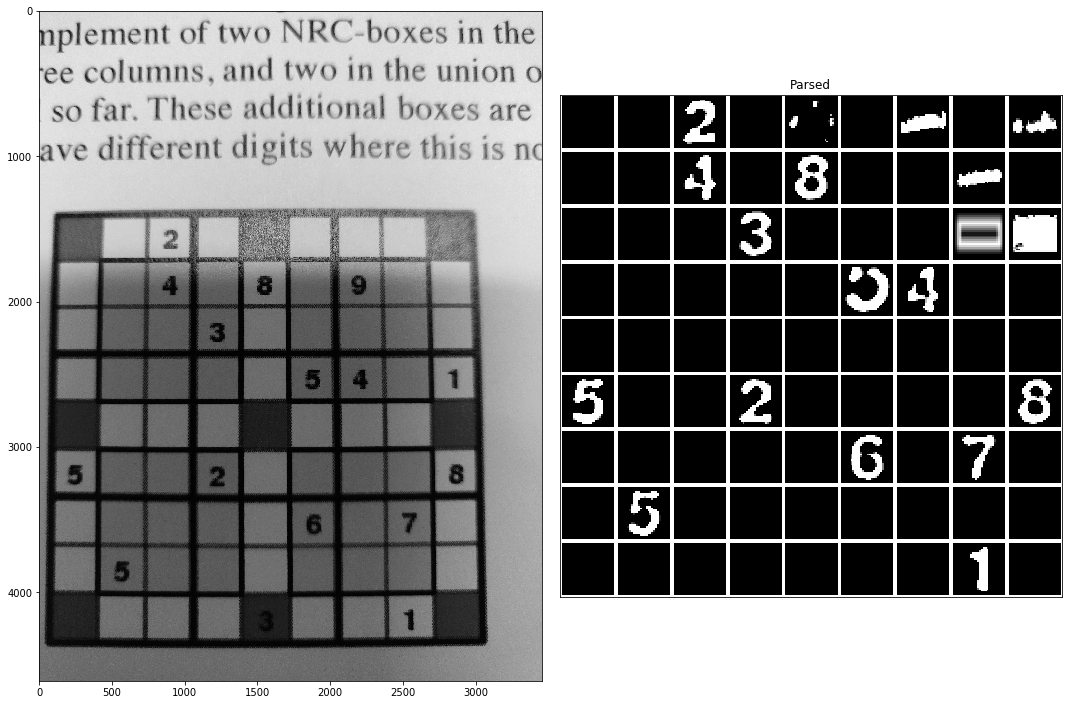

data/examples/2-example.png


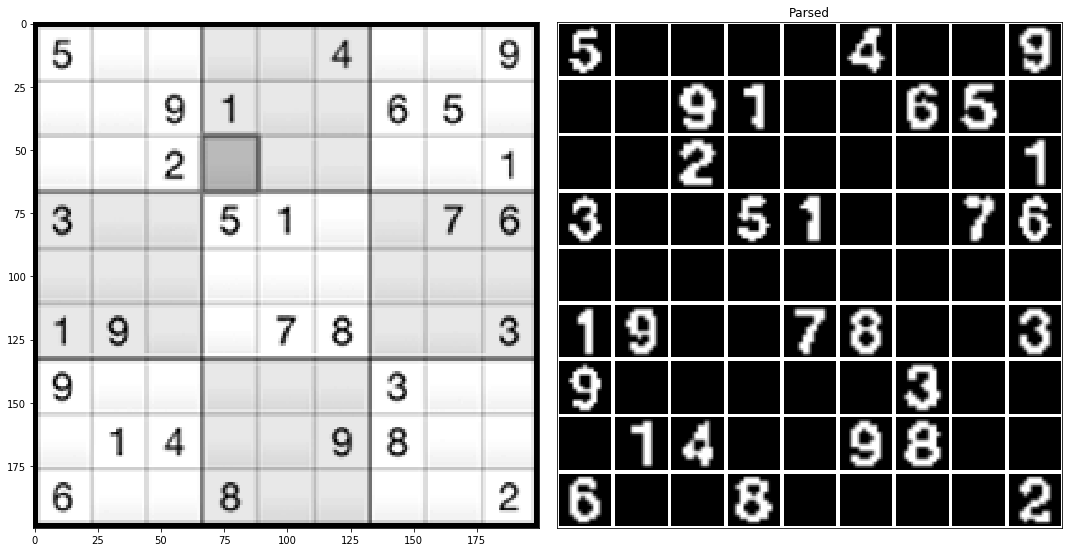

data/examples/4.jpg


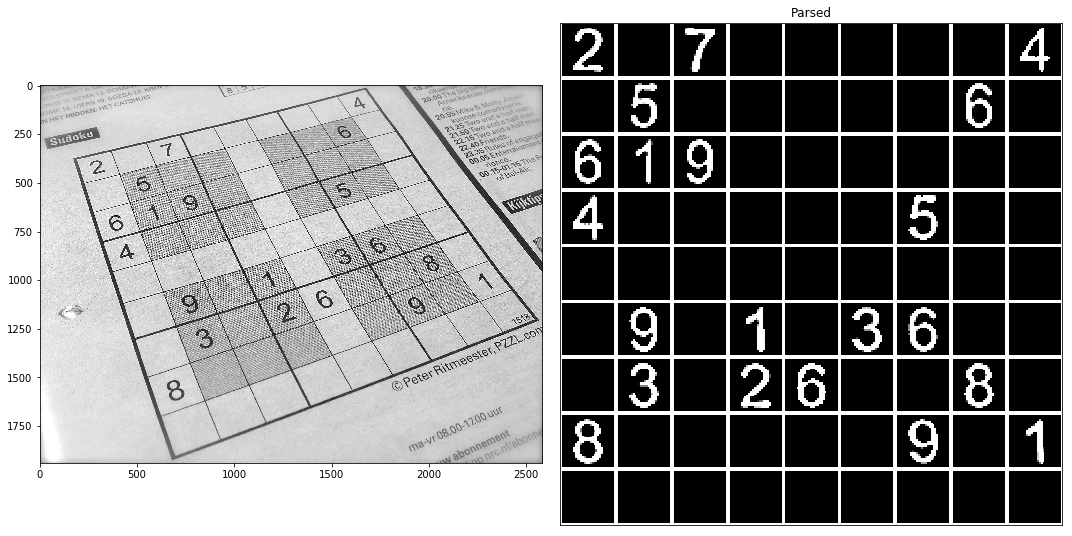

data/examples/4.png


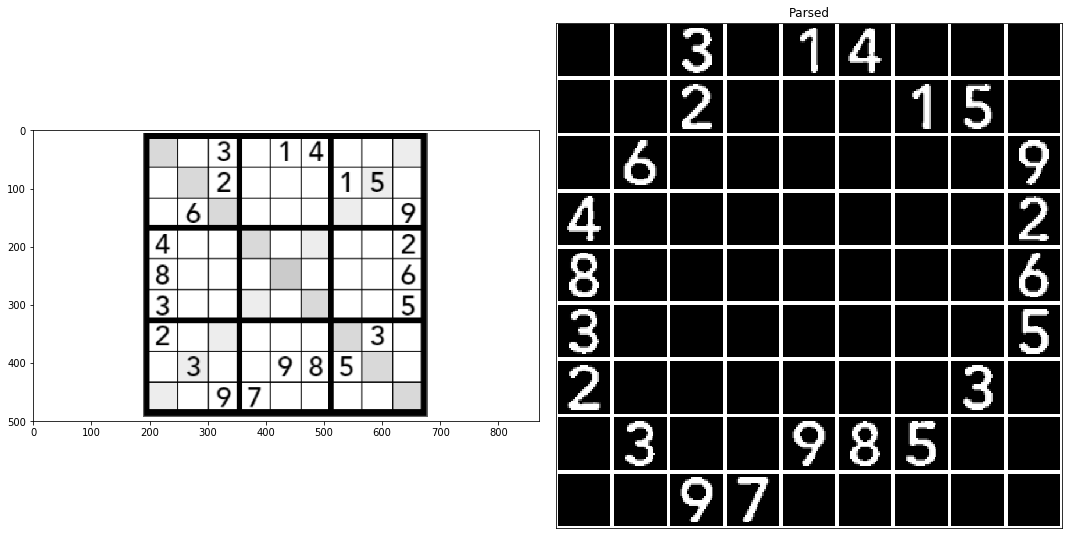

data/examples/5.jpg


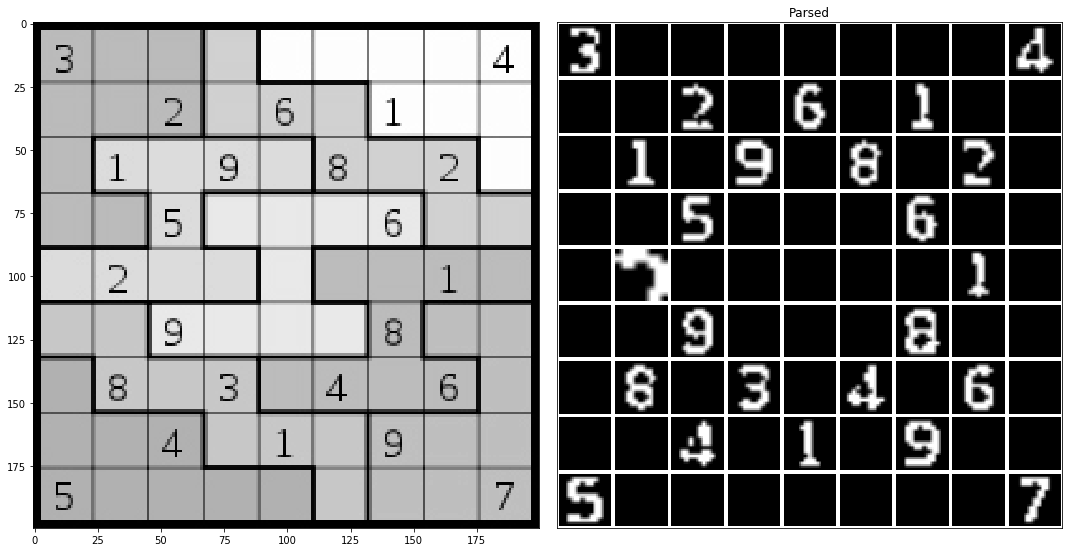

data/examples/7.png


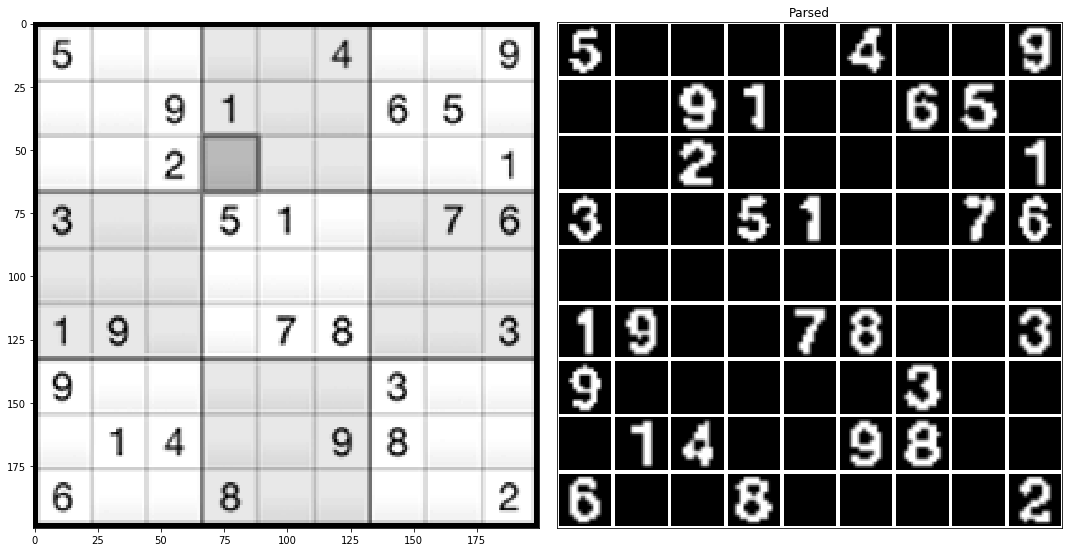

data/examples/6.png


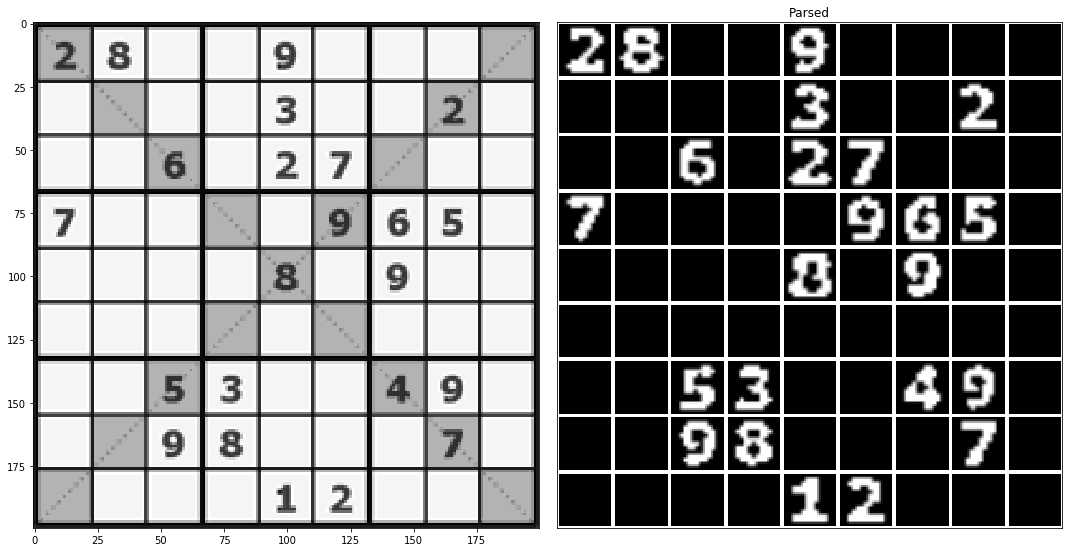

data/examples/2.jpg


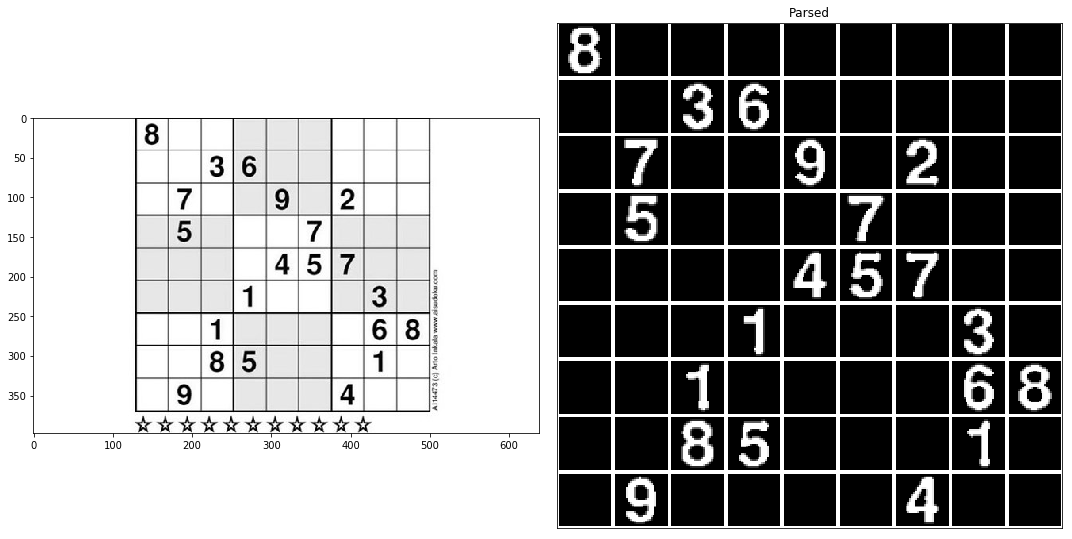

data/examples/3.jpg


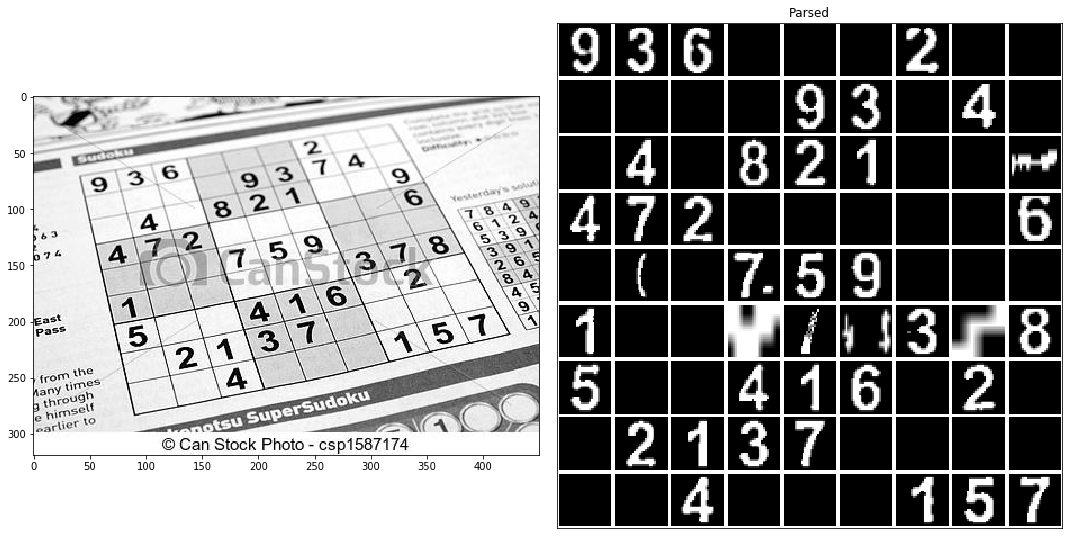

data/examples/1.jpg


KeyboardInterrupt: 

In [2]:
from sudoku.image_parser import (
    load_image, parse_grid
)
from sudoku.plotting import (
    image_from_digits, show_image, plot_many_images
)


def is_image(file: str) -> bool: 
    file = file.lower()
    return (
        file.endswith('.jpg') or 
        
        file.endswith('.jpeg') or 
        file.endswith('.png')
    )

directory = 'data/examples/'


def plot_example(path):
    img = load_image(path)
    digits = parse_grid(img)
    digit_img = image_from_digits(digits)
    plot_many_images([img, digit_img], ['Original', 'Parsed'])


def plot_many_images(images, titles):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 10))
    for ax, img, title in zip(axs, images, titles):
        ax.imshow(img, interpolation="nearest", cmap="gray")
        plt.tight_layout()
        plt.title(title)
        plt.xticks([]), plt.yticks([])  # Hide tick marks
    plt.show()
    
    
for file in os.listdir(directory):
    if is_image(file):
        path = directory + file
        print(path)
        
        plot_example(path)

In [ ]:
from sudoku.image_parser import *
from sudoku.plotting import *

# Extensive loop  
for file in os.listdir(directory):
#     file = '18.jpg'
    if is_image(file):
        path = directory + file
        print(path)
        
        img = load_image(path)
        show_image(img)
        
        cropped = crop_to_grid(img)
        show_image(cropped)
        enhanced_digits = enhance_digits(cropped)
        show_image(enhanced_digits)
        
        squares = infer_grid(enhanced_digits)
        patches = extract_patches(enhanced_digits, squares)
        
        digits = [extract_digit(patch) for patch in patches]
        show_image(image_from_digits(digits))
        input()